<a href="https://colab.research.google.com/github/bhoopesh-11/DL_Mini_Proj/blob/main/DL_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [94]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [86]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [87]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   # NEW

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   # NEW

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),    # NEW
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [90]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6848 - loss: 0.8638 - val_accuracy: 0.8508 - val_loss: 0.3902
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8421 - loss: 0.4404 - val_accuracy: 0.8715 - val_loss: 0.3451
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8624 - loss: 0.3812 - val_accuracy: 0.8890 - val_loss: 0.2959
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8734 - loss: 0.3520 - val_accuracy: 0.8922 - val_loss: 0.2833
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 0.3268 - val_accuracy: 0.8980 - val_loss: 0.2727
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8842 - loss: 0.3152 - val_accuracy: 0.9000 - val_loss: 0.2628
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8894 - loss: 0.3009 - val_accuracy: 0.9067 - val_loss: 0.2552
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8921 - loss: 0.2902 -

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9048 - loss: 0.2554
Test Accuracy: 0.9072999954223633


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


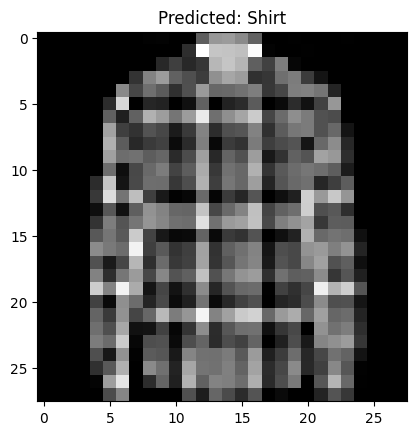

In [97]:
import numpy as np

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

predictions = model.predict(X_test)

index = 7
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted: " + class_names[np.argmax(predictions[index])])
plt.show()


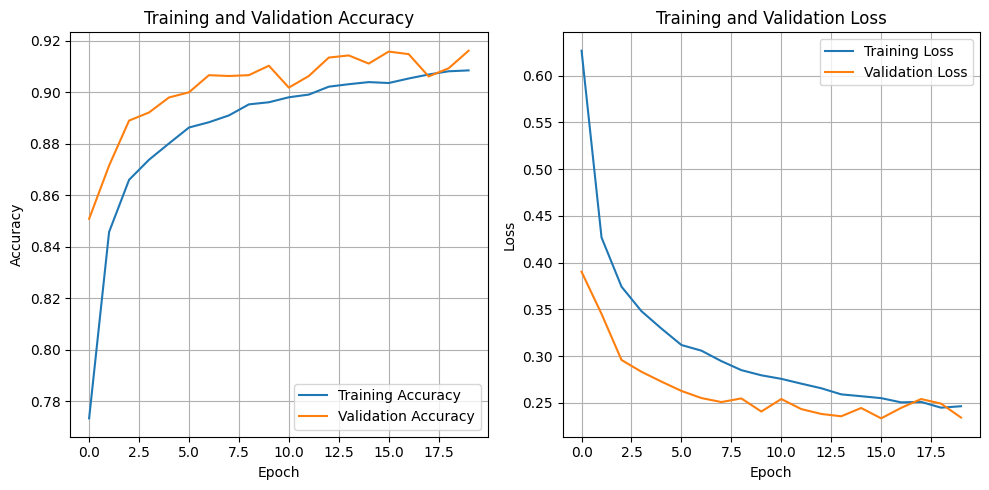

In [93]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()